In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

In [3]:
df = pd.read_csv("../preprocessing/iot23_combined.csv")
del df["Unnamed: 0"]
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344670,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1344671,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1344672,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1344673,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 10, test_size=0.2)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
start = time.time()
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
end = time.time()
print(f'time: {end - start}')
score = DT.score(X_test,Y_test)

time: 4.013295650482178


In [7]:
rep = classification_report(Y_test, Y_pred, output_dict = True)
d = pd.DataFrame(rep).transpose()
d.to_csv("../Model Results/DTC.csv")

In [8]:
class_names = df['label'].unique()
class_names

array(['PartOfAHorizontalPortScan', 'Benign', 'C&C', 'Attack',
       'C&C-HeartBeat', 'Okiru', 'DDoS', 'C&C-Torii', 'C&C-FileDownload',
       'FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai'],
      dtype=object)

Text(0.5, 15.0, 'Predicted label')

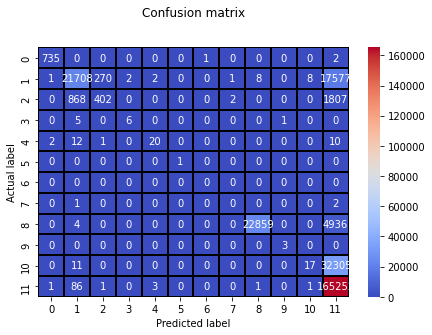

In [9]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="coolwarm" ,fmt='g', linewidths=2, linecolor='black')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')